This Jupyter Notebook is to test the Pre-processing Pipeline. Currently the evaluation dataset is loaded for quick processing. The pipeline works in the way:
1. Load patches (with temporal instances) from the file system
2. Remove Border pixels of the sugarbeet field within the patch
3. Select relevant Vegetation Indices and Sentinel-2 Bands from the image tensors 
4. Return model-ready data cubes: *patch_cubes*

Note! 
- The temporal *patch_cubes* created through this pipeline are to be used for Masked Autoencoder(MAE) Model directly.
- In case of Baseline models, the patches are further divied into sub-patches.

Imports

In [2]:
import os, sys
from pathlib import Path

os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
sys.path.append('/home/k64835/Master-Thesis-SITS')

scripts_path = Path("../Data-Preprocessing/").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Data-Preprocessing/Pipeline").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Evaluation/").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Modeling/").resolve()
sys.path.append(str(scripts_path))

In [3]:
import pickle
from scripts.data_visualiser import *
from scripts.data_loader import *
from scripts.data_preprocessor import *
from scripts.temporal_data_preprocessor import *
from scripts.temporal_data_loader import *
from scripts.temporal_visualiser import *
from scripts.temporal_chanel_refinement import *
from Pipeline.temporal_preprocessing_pipeline import *
import numpy as np
import config as config

Pre-processing Pipeline

In [3]:
preprocessing_pipeline = PreProcessingPipelineTemporal()
field_numbers, acquisition_dates, patch_cubes = preprocessing_pipeline.get_processed_temporal_cubes('eval', 'allbands')
(patch_cubes[0][0].shape)

Visualising the first Image Temporal Cube

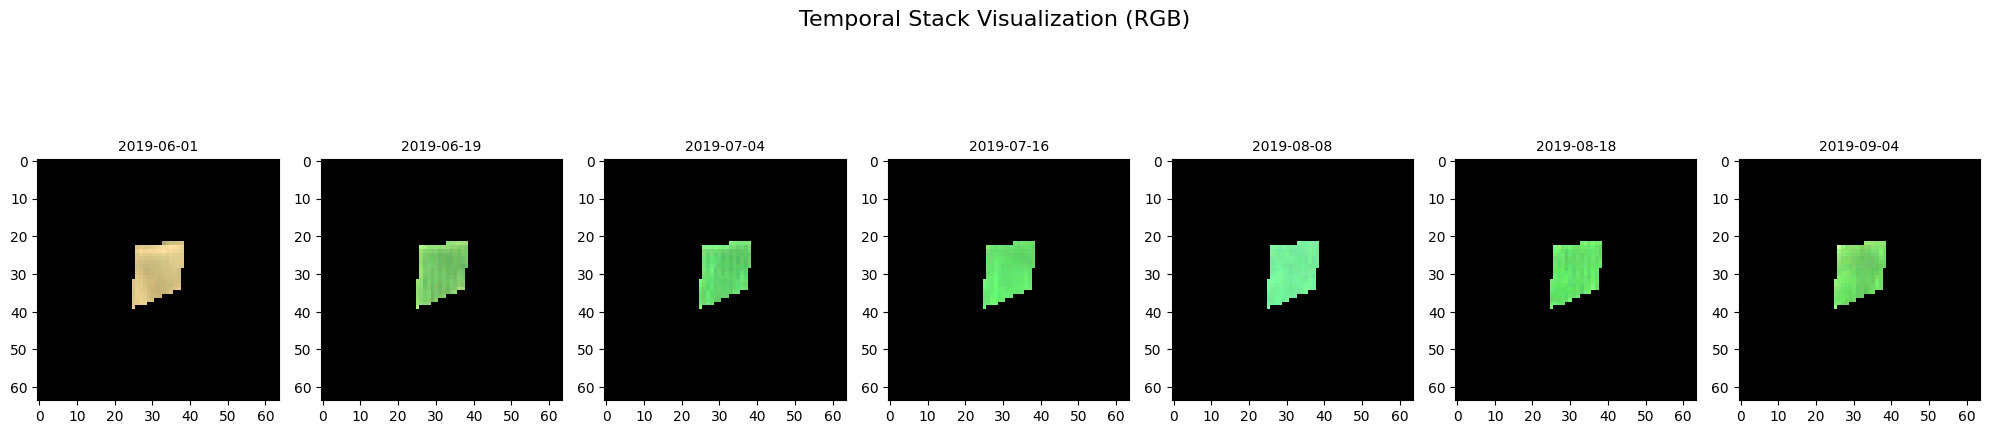

In [31]:
visualize_temporal_stack_rgb(patch_cubes[0],acquisition_dates[field_numbers[0]])